In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Load dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target
feature_names = housing.feature_names

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (20640, 8)
Target shape: (20640,)


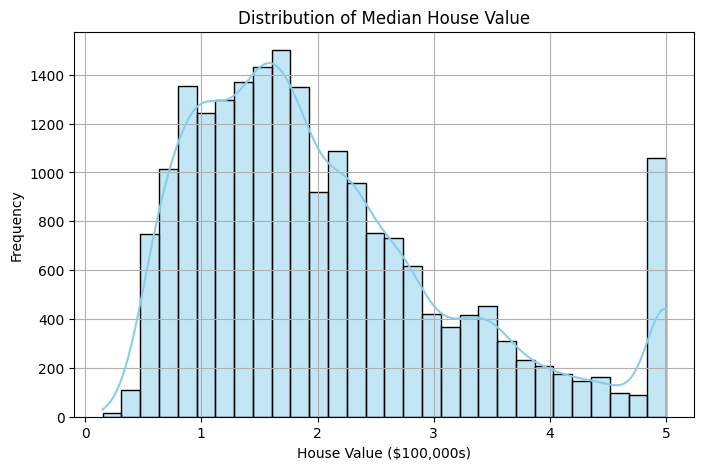

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, bins=30, color='skyblue')
plt.title("Distribution of Median House Value")
plt.xlabel("House Value ($100,000s)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# KNN Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict
y_pred = knn.predict(X_test_scaled)


In [7]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 0.43
R² Score: 0.67


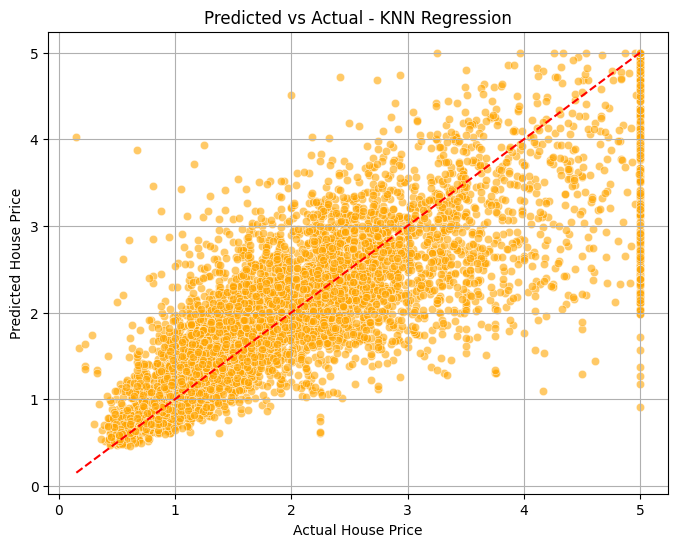

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Predicted vs Actual - KNN Regression")
plt.grid(True)
plt.show()


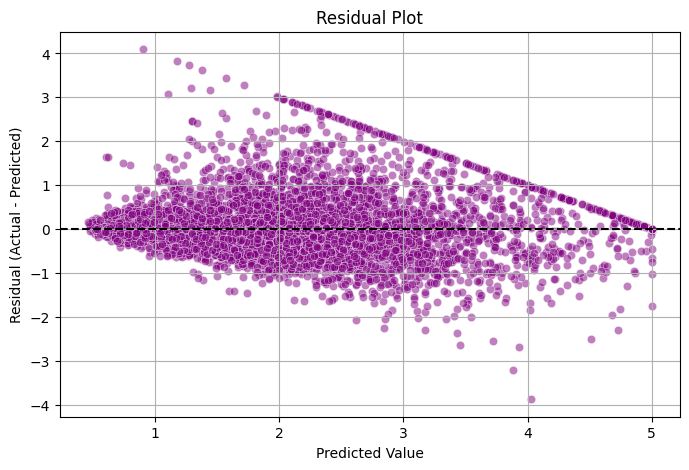

In [9]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals, color='purple', alpha=0.5)
plt.axhline(0, linestyle='--', color='black')
plt.title("Residual Plot")
plt.xlabel("Predicted Value")
plt.ylabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.show()
